In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.matlib
import pandas as pd
import seaborn as sns
import numpy.linalg as la
from sklearn.preprocessing import normalize
from matplotlib import colors as mcolors
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
df.isnull().any().any()

False

In [4]:
df.rename(columns={0:'id',1:'clump thickness',2:'uniformity of cellsize',
           3:'uniformity of cell shape',4:'marginal adhesion', 
           5:'single epithelial cell size',6:'bare nuclei', 
           7:'bland chromatin',8:'normal nucleoli',9:'mitosis',10:'class'},inplace=True)

'''Sample code number: id number
Clump Thickness: 1 - 10
Uniformity of Cell Size: 1 - 10
Uniformity of Cell Shape: 1 - 10
Marginal Adhesion: 1 - 10
Single Epithelial Cell Size: 1 - 10
Bare Nuclei: 1 - 10
Bland Chromatin: 1 - 10
Normal Nucleoli: 1 - 10
Mitoses: 1 - 10
Class: (2 for benign, 4 for malignant)'''


'Sample code number: id number\nClump Thickness: 1 - 10\nUniformity of Cell Size: 1 - 10\nUniformity of Cell Shape: 1 - 10\nMarginal Adhesion: 1 - 10\nSingle Epithelial Cell Size: 1 - 10\nBare Nuclei: 1 - 10\nBland Chromatin: 1 - 10\nNormal Nucleoli: 1 - 10\nMitoses: 1 - 10\nClass: (2 for benign, 4 for malignant)'

no null values

In [5]:
df['class'] = df['class'].replace(to_replace = 2, value = 0) #benign
df['class'] = df['class'].replace(to_replace = 4, value = 1) #malignant

In [6]:
df['bare nuclei'] = df['bare nuclei'].replace(to_replace = '?', value = None)

In [7]:
df['bare nuclei'] = df['bare nuclei'].astype('int64')

In [8]:
df = df.drop(columns=['id'])
data = df
data #class column

,clump thickness,uniformity of cellsize,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


We have two dataframes. df is the dataframe without the class, which idetifies the tumors as belign or malignant, column and data includes the class colum. We us df to run kmeans and class to 

In [9]:
df = df.drop(columns='class')

In [10]:
data['class']

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

# PCA

In [11]:
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [12]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [13]:
dfarr = df.to_numpy().T
dfarr

array([[ 5,  5,  3, ...,  5,  4,  4],
       [ 1,  4,  1, ..., 10,  8,  8],
       [ 1,  4,  1, ..., 10,  6,  8],
       ...,
       [ 3,  3,  3, ...,  8, 10, 10],
       [ 1,  2,  1, ..., 10,  6,  4],
       [ 1,  1,  1, ...,  2,  1,  1]], dtype=int64)

In [14]:
mean = np.reshape(np.mean(dfarr, axis = 1),(9,1))
A = dfarr - (np.matlib.repmat(mean, 1,699))
eigvals_old, Vold = np.linalg.eig(np.dot(A.T,A))
V, D = eigsort(Vold, eigvals_old)
U = normc(np.dot(A,V))
c = np.dot(U.T, A)
Z = np.matmul(U[:,0:2], c[0:2]) + mean

<ipython-input-12-51f6e317775b>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  Vsort[:,i] = V[:,index[i]]


In [15]:
data['X'] = c[0]
data['Y'] = c[1]
data['Z'] = c[2]
df['X'] = c[0]
df['Y'] = c[1]
df['Z'] = c[2]
data

,clump thickness,uniformity of cellsize,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class,X,Y,Z
0,5,1,1,1,2,1,3,1,1,0,4.437523,0.140152,1.739688
1,5,4,4,5,7,10,3,2,1,0,-4.842940,-4.875919,-0.861617
2,3,1,1,1,2,2,3,1,1,0,4.594002,-0.603916,-0.027812
3,6,8,8,1,3,4,3,7,1,0,-5.145849,3.458943,2.032486
4,4,1,1,3,2,1,3,1,1,0,4.072230,-0.037962,-0.055371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0,4.928586,-0.445218,0.130176
695,2,1,1,1,2,1,1,1,1,0,5.916401,0.197057,-0.606264
696,5,10,10,3,7,3,8,10,2,1,-10.319805,7.208938,-0.794679
697,4,8,6,4,3,4,10,6,1,1,-6.449759,2.488778,-1.817876


<AxesSubplot:xlabel='X', ylabel='Y'>

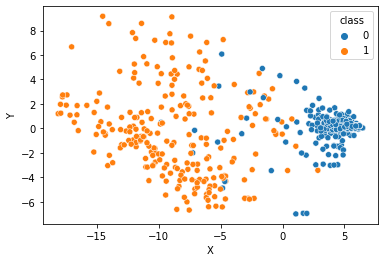

In [16]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'class', data = data) #actual clusters

# K-Means

In [17]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]
    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])
    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)
    plt.scatter(X[:,3], X[:,9], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

In [18]:
def calcSqDistances(X, Kmus): #NEED TO CALCULATE MULTIDIMENSIONAL DISTANCE
    N = np.shape(X)[0]
    K = Kmus.shape[0]
    D = [] #initialize to be NxK shape np.zeros()
    for point in X:
        for kpoint in Kmus:
            #D.append([(la.norm(point - kpoint))**2])
            #D.append([(point - kpoint)**2])
            #print(type(point),type(kpoint))
            #print(point, kpoint)
            D.append(np.sqrt(np.sum((point - kpoint)**2)))
    D = np.array(D)
    D = D.reshape((N, K))
                     
    return D

In [19]:
def determineRnk(sqDmat):
    m,n = sqDmat.shape
    for arr in sqDmat:
        index = np.argmin(arr, axis = None, out = None)
        for i in range(n):
            if not i==index:
                arr[i] = 0
        arr[index] = 1
    return sqDmat

In [20]:
def recalcMus(X, Rnk):
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk,axis=0))).T

In [21]:
def runKMeans3D(K, data):
    X = data.to_numpy()
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    maxiters = 1000;
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus);
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus
        #plotCurrent(X, Rnk, Kmus)
        #plt.show()
    ##        
        clus = Rnk.T[0]
        clus = clus.astype('int')
        
        
        clusters = 2   
        colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                      ).items())))[1]
        skips = math.floor(len(colors[5 : -5])/clusters)
        cluster_colors = colors[5 : -5 : skips]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.scatter(c[0], c[1], c[2], 
           c = list(map(lambda label : cluster_colors[label],
                                            clus)))
   
        str_labels = list(map(lambda label:'% s' % label, clus))
   
        list(map(lambda data1, data2, data3, str_label:
        ax.text(data1, data2, data3, s = str_label, size = 0.6,
        zorder = 20, color = 'k'), c[0], c[1],
        c[2], str_labels))
   
        plt.show()
    ##
    
    
        Kmus = recalcMus(X, Rnk)
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break   
            
            
    #plotCurrent(X,Rnk,Kmus)
    return Rnk

In [26]:
def runKMeans(K, data):
    X = data.to_numpy()
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    maxiters = 1000;
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus);
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus
        #plotCurrent(X, Rnk, Kmus)
        #plt.show()
            
        clus = Rnk.T[0]
        clus = clus.astype('int')
        
        data['Rnk'] = clus
        Kmus = recalcMus(X, Rnk)
        
        
        c = np.dot(U.T, Kmus[:,0:9].T-mean)
        
        
        sns.scatterplot(x = 'X', y = 'Y', hue = 'Rnk', data = data)
        plt.scatter(c[0],c[1],marker='x',color='k',s=80)
        plt.show()
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break   
            
            
    #plotCurrent(X,Rnk,Kmus)
    return Rnk

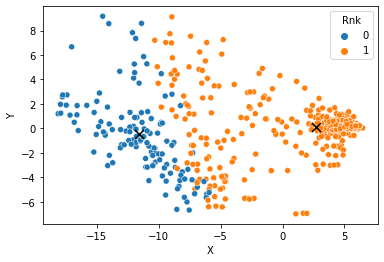

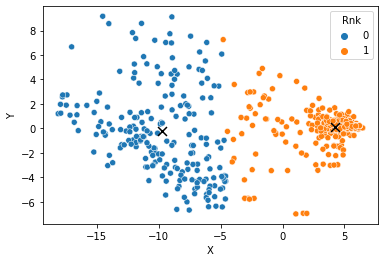

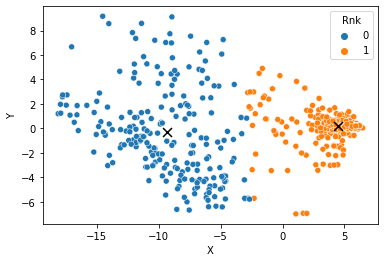

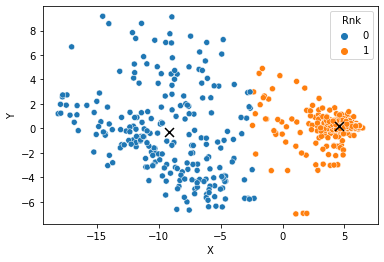

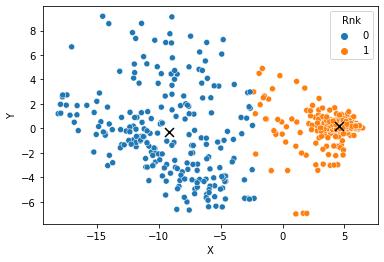

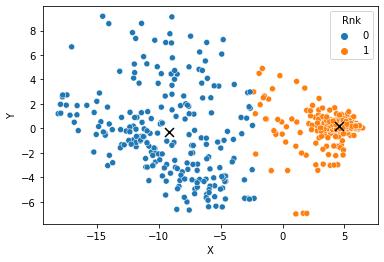

In [23]:
U.shape
Rnk = runKMeans(2, df)

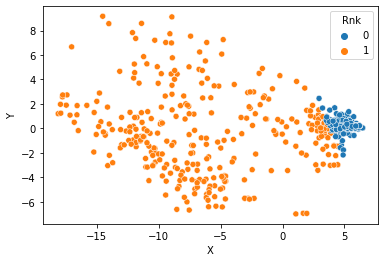

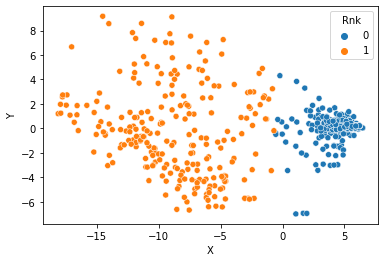

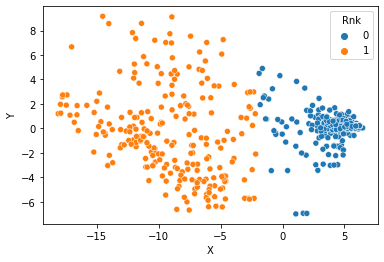

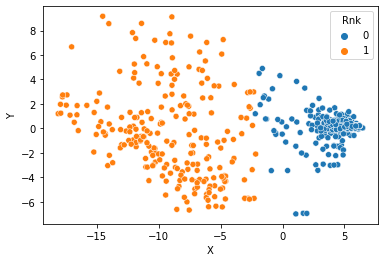

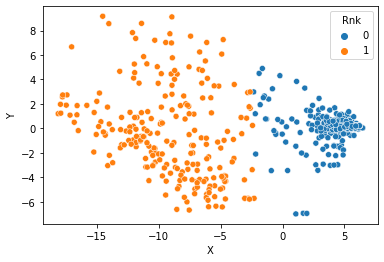

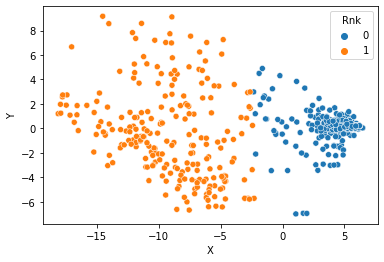

In [27]:
a = df.iloc[:,9:11] #k means on the PCA data compared to 
clus = runKMeans(2, a)

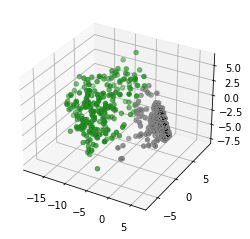

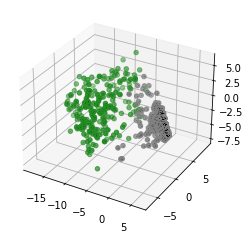

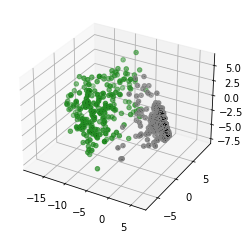

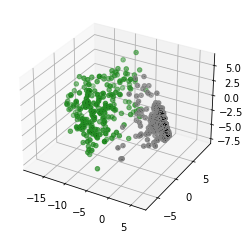

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [25]:
runKMeans3D(2,df)

# Model Accuracy

In [29]:
clusters = Rnk.T[1]
clus = Rnk.T[0]
sum(data['class']==clusters)

669

In [ ]:
#%matplotlib qt

add model accuracy compare to MOG (set threshold to decided which cluster group)
compare k-means with and without PCA